In [1]:
import numpy as np
import pandas as pd
from cmdstanpy import CmdStanModel
from matplotlib import pyplot as plt

# Section 10.1.1

In [2]:
df4_3 = pd.read_csv("../chapter04/data/data-salary.txt")
print(df4_3.count())
df4_3.head(5)

X    20
Y    20
dtype: int64


,X,Y
0,24,472
1,24,403
2,26,454
3,32,575
4,33,546


In [3]:
data4_3 = {
    "N": len(df4_3),
    "X": df4_3["X"].values,
    "Y": df4_3["Y"].values
}

In [4]:
model4_3 = CmdStanModel(stan_file="model/model4-3.stan")
print(model4_3)
fit4_3 = model4_3.sample(data=data4_3)

INFO:cmdstanpy:compiling stan program, exe file: /workdir/chapter10/model/model4-3
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /workdir/chapter10/model/model4-3
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4


CmdStanModel: name=model4-3
	 stan_file=/workdir/chapter10/model/model4-3.stan
	 exe_file=/workdir/chapter10/model/model4-3
	 compiler_optons=stanc_options=None, cpp_options=None


INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 3


In [5]:
fit4_3.summary().loc[["a", "b", "sigma"]]

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
a,-117.8980,1.999270,74.17180,-237.7090,-119.9960,3.09809,1376.37,4170.82,1.00056
b,21.8651,0.044770,1.65428,19.1043,21.9109,24.61960,1365.35,4137.44,1.00059
sigma,85.3234,0.363847,15.17160,64.2941,83.4771,112.74700,1738.69,5268.77,1.00332


In [6]:
model10_1 = CmdStanModel(stan_file="model/model10-1.stan")
print(model10_1)
fit10_1 = model10_1.sample(data=data4_3)

INFO:cmdstanpy:compiling stan program, exe file: /workdir/chapter10/model/model10-1
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /workdir/chapter10/model/model10-1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4


CmdStanModel: name=model10-1
	 stan_file=/workdir/chapter10/model/model10-1.stan
	 exe_file=/workdir/chapter10/model/model10-1
	 compiler_optons=stanc_options=None, cpp_options=None


INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 1


In [7]:
fit10_1.summary().loc[["a", "b", "c", "sigma"]]

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
a,-93.6847,35.35320,69.2145,-209.9630,-84.9602,5.29226,3.83298,0.287567,1.81443
b,-2565.9600,2849.97000,4297.3000,-9162.3100,-1183.5200,3874.33000,2.27358,0.170574,3.76298
c,2587.3100,2849.86000,4297.2000,-3859.9600,2525.5400,9181.61000,2.27365,0.170579,3.76282
sigma,80.7097,5.03368,13.2392,61.3765,79.9690,100.18400,6.91759,0.518988,1.30576


R_hatの値から、収束していないことがわかる。bとcの値をplotすると、予想通り、その和はほぼ一定の値になっている。

Text(0, 0.5, 'c')

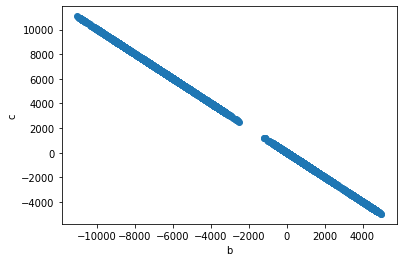

In [8]:
ax = plt.subplot(1, 1, 1)
ax.plot(fit10_1.stan_variable("b"), fit10_1.stan_variable("c"), 'o')
ax.set_xlabel("b")
ax.set_ylabel("c")

In [9]:
b_plus_c = fit10_1.stan_variable("b") + fit10_1.stan_variable("c")
b_plus_c.mean(), b_plus_c.std()

(21.346621929999998, 1.5512422665058703)

# Section 10.1.4

In [10]:
df10_2 = pd.read_csv("data/data-category.txt")
print(df10_2.count())
df10_2.head(5)

Age       300
Sex       300
Income    300
Y         300
dtype: int64


,Age,Sex,Income,Y
0,18,1,472,2
1,18,0,468,5
2,18,1,451,6
3,18,1,441,6
4,18,1,499,6


In [11]:
N = len(df10_2)
D = 4
X = np.zeros((N, D))
X[:, 0] = np.ones(N)
X[:, 1] = df10_2["Age"].values/10
X[:, 2] = df10_2["Sex"].values
X[:, 3] = df10_2["Income"].values/100

data10_2 = {
    "N": N,
    "K": 6,
    "D": D,
    "X": X,
    "Y": df10_2["Y"].values
}

In [12]:
model10_2 = CmdStanModel(stan_file="model/model10-2.stan")
print(model10_2)
fit10_2 = model10_2.sample(data=data10_2)

INFO:cmdstanpy:compiling stan program, exe file: /workdir/chapter10/model/model10-2
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /workdir/chapter10/model/model10-2
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4


CmdStanModel: name=model10-2
	 stan_file=/workdir/chapter10/model/model10-2.stan
	 exe_file=/workdir/chapter10/model/model10-2
	 compiler_optons=stanc_options=None, cpp_options=None


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 2


In [13]:
summary10_2 = fit10_2.summary()
summary10_2[summary10_2["R_hat"] >= 1.1]

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,


# Section 10.1.5

In [14]:
df10_3 = pd.read_csv("data/data-usagitokame.txt")
print(len(df10_3))
df10_3.head(5)

30


,Loser,Winner
0,1,2
1,1,2
2,2,1
3,1,2
4,1,2


In [15]:
# simulation
G = 30
mu_pf = np.array([0.0, 1.5])
pf = np.random.normal(size=(G, 2)) + mu_pf
d = np.array([[1, 2] if tmp[0] < tmp[1] else [2,1] for tmp in pf])

df10_3_simulated = pd.DataFrame(columns=["Loser", "Winner"], data=d)

print("The number of games the turtle won : ", (d - 1)[:, 0].sum())
print("The number of games the rabbit won : ", (d - 1)[:, 1].sum())

The number of games the turtle won :  6
The number of games the rabbit won :  24


In [16]:
model10_3 = CmdStanModel(stan_file="model/model10-3.stan")
print(model10_3)

INFO:cmdstanpy:compiling stan program, exe file: /workdir/chapter10/model/model10-3
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /workdir/chapter10/model/model10-3


CmdStanModel: name=model10-3
	 stan_file=/workdir/chapter10/model/model10-3.stan
	 exe_file=/workdir/chapter10/model/model10-3
	 compiler_optons=stanc_options=None, cpp_options=None


In [17]:
fit10_3 = model10_3.sample(data={
    "N": 2,
    "G": len(df10_3),
    "LW": df10_3.values
})
fit10_3.summary().loc["b"]

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 2


Mean          1.6
MCSE          0.0
StdDev        0.4
5%            0.9
50%           1.6
95%           2.3
N_Eff      1951.0
N_Eff/s     862.5
R_hat         1.0
Name: b, dtype: float64

In [18]:
# inference on the simulated data

fit10_3_simulated = model10_3.sample(data={
    "N": 2,
    "G": len(df10_3_simulated),
    "LW": df10_3_simulated.values
})
fit10_3_simulated.summary().loc["b"]

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2


Mean          1.2
MCSE          0.0
StdDev        0.4
5%            0.6
50%           1.2
95%           1.8
N_Eff      2541.9
N_Eff/s    1096.1
R_hat         1.0
Name: b, dtype: float64